In [86]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.dates import DateFormatter


# Modelling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectFromModel

In [87]:
#load data
merge_csv = pd.read_csv('data/merged_data.csv', parse_dates=['DataDate'])
merge_csv.head()

,DataDate,PM2.5,PM2_5,Temp,Hum
0,2023-08-25 06:01:00,18.07556,28.0,0.0,0.0
1,2023-08-25 06:02:00,18.32117,26.0,0.0,0.0
2,2023-08-25 06:03:00,18.42729,26.0,0.0,0.0
3,2023-08-25 06:04:00,18.44625,29.0,0.0,0.0
4,2023-08-25 06:05:00,18.59127,26.0,0.0,0.0


In [88]:
train_set, test_set = train_test_split(merge_csv, test_size=0.2, random_state=485645)
train_set

,DataDate,PM2.5,PM2_5,Temp,Hum
575,2023-08-25 17:09:00,8.595349,6.0,25.7,84.00
219,2023-08-25 09:59:00,11.919960,15.0,0.0,0.00
788,2023-08-25 21:00:00,7.303940,6.0,21.8,99.00
892,2023-08-25 22:50:00,9.391881,13.0,22.0,97.00
387,2023-08-25 13:44:00,8.846948,9.0,27.4,78.00
...,...,...,...,...,...
609,2023-08-25 17:50:00,9.007333,7.0,22.8,91.00
1539,2023-08-26 09:51:00,11.288230,8.0,23.9,91.00
226,2023-08-25 10:06:00,11.769080,15.0,0.0,0.00
1293,2023-08-26 05:36:00,12.707380,19.0,21.4,99.58


In [89]:
train_set.shape

(1269, 5)

In [90]:
test_set.head()

,DataDate,PM2.5,PM2_5,Temp,Hum
83,2023-08-25 07:31:00,24.19335,37.0,0.0,0.0
240,2023-08-25 10:20:00,15.37881,17.0,0.0,0.0
755,2023-08-25 20:27:00,6.95343,6.0,21.8,99.0
140,2023-08-25 08:38:00,17.73177,22.0,0.0,0.0
964,2023-08-26 00:03:00,11.37309,11.0,21.8,99.0


In [91]:
test_set.shape

(318, 5)

In [92]:
calibration_df = train_set.copy()
calibration_df.head()

,DataDate,PM2.5,PM2_5,Temp,Hum
575,2023-08-25 17:09:00,8.595349,6.0,25.7,84.0
219,2023-08-25 09:59:00,11.919960,15.0,0.0,0.0
788,2023-08-25 21:00:00,7.303940,6.0,21.8,99.0
892,2023-08-25 22:50:00,9.391881,13.0,22.0,97.0
387,2023-08-25 13:44:00,8.846948,9.0,27.4,78.0


## Handling Numerical Columns

In [93]:
calibration_df = train_set.drop('PM2.5', axis=1)
calibration_df_labels = train_set['PM2.5'].copy()

In [94]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
calibration_df_num = calibration_df.drop("DataDate", axis=1)

In [95]:
imputer.fit(calibration_df_num)
imputer.statistics_

array([ 8. , 21.9, 94. ])

In [96]:
X = imputer.transform(calibration_df_num)
calibration_df_tr = pd.DataFrame(X, columns=calibration_df_num.columns, index = calibration_df_num.index)
calibration_df_tr

,PM2_5,Temp,Hum
575,6.0,25.7,84.00
219,15.0,0.0,0.00
788,6.0,21.8,99.00
892,13.0,22.0,97.00
387,9.0,27.4,78.00
...,...,...,...
609,7.0,22.8,91.00
1539,8.0,23.9,91.00
226,15.0,0.0,0.00
1293,19.0,21.4,99.58


## Transformation Pipelines

In [97]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler  # If needed for additional preprocessing

In [98]:
num_pipeline = Pipeline([
    
('imputer', SimpleImputer(strategy="median")),  
    
])



In [99]:
from sklearn.compose import ColumnTransformer

num_attribs = list(calibration_df_num)

full_pipeline = ColumnTransformer([
    
("num", num_pipeline, num_attribs),   
])

In [100]:
calibration_df_prepared = full_pipeline.fit_transform(calibration_df)
calibration_df_prepared

array([[ 6.  , 25.7 , 84.  ],
       [15.  ,  0.  ,  0.  ],
       [ 6.  , 21.8 , 99.  ],
       ...,
       [15.  ,  0.  ,  0.  ],
       [19.  , 21.4 , 99.58],
       [14.  ,  0.  ,  0.  ]])

## Models to experiment with
* Linear Regression, Elastic net, Ridge, Lasso
*  Random Forests
*  k-Nearest Neighbors (KNN)
*  Support Vector Machines (SVMs)
*  XGBoost
* Gradient Boosting
* AdaBoost Regressor

In [101]:
# Define a list of regression models
models = [

    ('Linear Regression', LinearRegression()),
    ('Elastic Net', ElasticNet()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('Random Forest', RandomForestRegressor()),
    ('k-Nearest Neighbors', KNeighborsRegressor()),
    ('Support Vector Machines', SVR()),
    ('XGBoost', XGBRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('CatBoosting Regressor', CatBoostRegressor(verbose=False)),
    ('AdaBoost Regressor', AdaBoostRegressor())
    
]


# Create an empty dictionary
metrics_dict = {}
cross_validation_metrics_dict = {}

# Evaluate each model
for name, model in models:
    model.fit(calibration_df_prepared, calibration_df_labels)
    y_pred = model.predict(calibration_df_prepared)
    
    rmse = np.sqrt(mean_squared_error(calibration_df_labels, y_pred))
    mae = mean_absolute_error(calibration_df_labels, y_pred)
    r2 = r2_score(calibration_df_labels, y_pred)
    correlation = np.corrcoef(calibration_df_labels, y_pred)[0, 1]

    # print(f'Model: {name}')
    # print(f'RMSE: {rmse}')
    # print(f'MAE: {mae}')
    # print(f'R-squared: {r2}')
    # print(f'Correlation: {correlation}')
    # print('---')

    metrics_dict[name] = [correlation, r2, mae, rmse]



# Perform 10-fold cross-validation to check for overfitting/underfitting
for name_cross_val, model_cross_val in models:
    scores = cross_val_score(model_cross_val, calibration_df_prepared, calibration_df_labels, cv=10, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    
    # print(f'Model: {name_cross_val}')
    # print(f'Mean RMSE (cross-validation): {rmse_scores.mean()}')
    # print('---')

    cross_validation_metrics_dict[name_cross_val] = [rmse_scores.mean()]


In [102]:
metrics_dict
df = pd.DataFrame(metrics_dict)
df['Models'] = ['correlation', 'r2', 'mae', 'rmse']
df.set_index('Models', inplace=True)
df.T.sort_values(by='correlation', ascending=False)



Models,correlation,r2,mae,rmse
XGBoost,0.980977,0.962314,0.483113,0.853681
Random Forest,0.980083,0.960550,0.518838,0.873441
CatBoosting Regressor,0.978535,0.957506,0.579722,0.906510
k-Nearest Neighbors,0.972409,0.945473,0.673479,1.026868
Gradient Boosting,0.972002,0.944745,0.704336,1.033698
AdaBoost Regressor,0.957130,0.914026,0.968607,1.289412
Support Vector Machines,0.949553,0.892649,1.014463,1.440823
Linear Regression,0.945552,0.894069,1.037270,1.431262
Ridge,0.945552,0.894069,1.037276,1.431262
Elastic Net,0.944181,0.891175,1.070289,1.450684


In [103]:
df1 = pd.DataFrame(cross_validation_metrics_dict)
df1['Models'] = ['cross_val_rmse']
df1.set_index('Models', inplace=True)
df1.T.sort_values(by='cross_val_rmse')

Models,cross_val_rmse
CatBoosting Regressor,1.110704
Gradient Boosting,1.145227
Random Forest,1.167107
XGBoost,1.180237
k-Nearest Neighbors,1.221859
AdaBoost Regressor,1.340987
Ridge,1.434110
Linear Regression,1.434110
Elastic Net,1.453402
Support Vector Machines,1.460679


## Fine-Tune the Best Models (hyperparameter Tuning)

### Random Forest

#### Grid Search

In [104]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3,
4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(calibration_df_prepared, calibration_df_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [105]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

## You can also get the best estimator directly:

In [106]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30)

In [107]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1.2099199106399634 {'max_features': 2, 'n_estimators': 3}
1.1795942311289402 {'max_features': 2, 'n_estimators': 10}
1.1598839130674343 {'max_features': 2, 'n_estimators': 30}
1.2360856617110991 {'max_features': 4, 'n_estimators': 3}
1.1877693182987807 {'max_features': 4, 'n_estimators': 10}
1.1565001290767536 {'max_features': 4, 'n_estimators': 30}
1.2543712842550467 {'max_features': 6, 'n_estimators': 3}
1.1972033384776934 {'max_features': 6, 'n_estimators': 10}
1.1717274432541485 {'max_features': 6, 'n_estimators': 30}
1.189432605399114 {'max_features': 8, 'n_estimators': 3}
1.1961486440075286 {'max_features': 8, 'n_estimators': 10}
1.1719112271403769 {'max_features': 8, 'n_estimators': 30}
1.2228098080817722 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1.2184874491396496 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
1.2603296286991232 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1.254895036697504 {'bootstrap': False, 'max_features': 3, 'n_e

### feature Impportance for tree based models

In [108]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.93939722, 0.02624257, 0.03436021])

In [109]:
sorted(zip(feature_importances, num_attribs), reverse=True)

[(0.939397224829043, 'PM2_5'),
 (0.034360208797932855, 'Hum'),
 (0.026242566373024145, 'Temp')]

##### PM2_5 > Hum > Temp

##  Evaluate Test Set On Random Forest

In [110]:
final_model = grid_search.best_estimator_
final_model

RandomForestRegressor(max_features=4, n_estimators=30)

In [111]:
test_set

,DataDate,PM2.5,PM2_5,Temp,Hum
83,2023-08-25 07:31:00,24.193350,37.0,0.0,0.0
240,2023-08-25 10:20:00,15.378810,17.0,0.0,0.0
755,2023-08-25 20:27:00,6.953430,6.0,21.8,99.0
140,2023-08-25 08:38:00,17.731770,22.0,0.0,0.0
964,2023-08-26 00:03:00,11.373090,11.0,21.8,99.0
...,...,...,...,...,...
195,2023-08-25 09:34:00,16.142430,16.0,0.0,0.0
433,2023-08-25 14:33:00,8.375084,6.0,26.8,79.0
913,2023-08-25 23:11:00,9.725831,10.0,22.0,99.0
1211,2023-08-26 04:13:00,7.035264,6.0,21.6,100.0


In [112]:
X_date = test_set['DataDate'].copy()
X_test = test_set.drop(["DataDate"], axis=1)
X_test

,PM2.5,PM2_5,Temp,Hum
83,24.193350,37.0,0.0,0.0
240,15.378810,17.0,0.0,0.0
755,6.953430,6.0,21.8,99.0
140,17.731770,22.0,0.0,0.0
964,11.373090,11.0,21.8,99.0
...,...,...,...,...
195,16.142430,16.0,0.0,0.0
433,8.375084,6.0,26.8,79.0
913,9.725831,10.0,22.0,99.0
1211,7.035264,6.0,21.6,100.0


In [113]:
y_test = test_set["PM2.5"].copy()
y_test

83      24.193350
240     15.378810
755      6.953430
140     17.731770
964     11.373090
          ...    
195     16.142430
433      8.375084
913      9.725831
1211     7.035264
1377    12.521070
Name: PM2.5, Length: 318, dtype: float64

In [114]:
X_test = X_test.drop(["PM2.5"], axis=1)
X_test

,PM2_5,Temp,Hum
83,37.0,0.0,0.0
240,17.0,0.0,0.0
755,6.0,21.8,99.0
140,22.0,0.0,0.0
964,11.0,21.8,99.0
...,...,...,...
195,16.0,0.0,0.0
433,6.0,26.8,79.0
913,10.0,22.0,99.0
1211,6.0,21.6,100.0


In [115]:
calibration_df_prepared_test = full_pipeline.fit_transform(X_test)
calibration_df_prepared_test

array([[ 37.  ,   0.  ,   0.  ],
       [ 17.  ,   0.  ,   0.  ],
       [  6.  ,  21.8 ,  99.  ],
       [ 22.  ,   0.  ,   0.  ],
       [ 11.  ,  21.8 ,  99.  ],
       [  5.  ,  21.6 , 100.  ],
       [  8.  ,  22.7 ,  97.  ],
       [  5.  ,  22.  ,  97.  ],
       [  5.  ,  28.5 ,  76.  ],
       [  8.  ,  21.9 ,  99.  ],
       [ 16.  ,  21.5 ,  99.75],
       [ 13.  ,  23.6 ,  92.  ],
       [ 11.  ,  22.  ,  95.  ],
       [  9.  ,  21.9 ,  99.  ],
       [  8.  ,  21.7 , 100.  ],
       [  7.  ,  27.3 ,  78.  ],
       [ 13.  ,  22.5 ,  93.  ],
       [ 25.  ,   0.  ,   0.  ],
       [  9.  ,  22.  ,  98.  ],
       [ 11.  ,  29.  ,  75.  ],
       [ 15.  ,  21.4 ,  99.68],
       [  5.  ,  21.5 , 100.  ],
       [ 16.  ,  21.7 ,  99.14],
       [  6.  ,  21.8 ,  99.  ],
       [ 11.  ,  24.2 ,  91.  ],
       [  8.  ,  21.8 ,  99.  ],
       [  9.  ,  27.6 ,  78.  ],
       [ 15.  ,  21.8 , 100.  ],
       [  7.  ,  21.5 , 100.  ],
       [  5.  ,  21.6 , 100.  ],
       [ 1

In [116]:
final_predictions_rf = final_model.predict(calibration_df_prepared_test)

In [117]:
def display_scores(scores):
#     print("Scores:", scores)
    print("Mean-------------->:", scores.mean())
    print("Standard deviation-------------->:", scores.std())
    
def _show_metrics_(y_labels, y_pred):
    # Calculate RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mean_squared_error(y_labels, y_pred))

    # Calculate MAE (Mean Absolute Error)
    mae = mean_absolute_error(y_labels, y_pred)

    # Calculate R-squared (R²)
    r_squared = r2_score(y_labels, y_pred)

    # Calculate the correlation coefficient (Pearson correlation)
    correlation = np.corrcoef(y_labels, y_pred)[0, 1]


    # Print the results
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R-squared (R²): {r_squared}")
    print(f"Correlation: {correlation}")
    
def _show_cross_val_rmse_metric(model, X_train, y_test):
    scores = cross_val_score(model, X_train, y_test, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    print('RMSE Metric')
    print('<------------>')
    display_scores(rmse_scores)
    
def _show_cross_val_mae_metric(model, X_train, y_test):
    scores = cross_val_score(model, X_train, y_test, scoring="neg_mean_absolute_error", cv=10)
    rmse_score = np.sqrt(-scores)
    print('MAE Metric')
    print('<------------>')
    display_scores(rmse_score)

In [118]:
_show_metrics_(y_test, final_predictions_rf)

RMSE: 1.151324305004379
MAE: 0.7314467472690116
R-squared (R²): 0.9185714537315895
Correlation: 0.9597164455521622


In [119]:
## Make scatter plot of y_pred and y_test
df = pd.DataFrame(final_predictions_rf, columns=['calibrated_PM2_5'], index = X_test.index)
combined_df = pd.concat([df, X_test, y_test, X_date], axis=1)
combined_df[combined_df['PM2_5'] >= 35]

,calibrated_PM2_5,PM2_5,Temp,Hum,PM2.5,DataDate
83,22.454812,37.0,0.0,0.0,24.19335,2023-08-25 07:31:00
45,22.226974,41.0,0.0,0.0,20.64883,2023-08-25 06:53:00
70,23.922134,36.0,0.0,0.0,22.94688,2023-08-25 07:18:00
97,22.454812,37.0,0.0,0.0,24.66936,2023-08-25 07:46:00
81,22.454812,37.0,0.0,0.0,23.89755,2023-08-25 07:29:00
71,20.772155,35.0,0.0,0.0,23.03398,2023-08-25 07:19:00
82,21.811280,42.0,0.0,0.0,23.96538,2023-08-25 07:30:00
58,22.860143,43.0,0.0,0.0,23.89653,2023-08-25 07:06:00


In [120]:
def scatter_plot(df, sensor_id):
    plt.figure(figsize=(10, 5))
    plt.scatter(df['PM2.5'], df['calibrated_PM2_5'], label='After Calibratiom', color='red', alpha=0.6)
    plt.scatter(df['PM2.5'], df['PM2_5'], label='Before Calibratiom',  color='blue', alpha=0.6)


            # Add a 1:1 line
    plt.plot([min(df['PM2.5']), 
                  max(df['PM2.5'])], 
                 [min(df['calibrated_PM2_5']), 
                 max(df['calibrated_PM2_5'])], 
                 color='black', 
                 linestyle='--', label='1:1 line')
    
#     Add a grid to the background
    plt.grid(True)
    
    plt.title('Scatter Plot')
    plt.xlabel('Teledyn PM2.5 (μg/m3)')
    plt.ylabel(f'{sensor_id}_PM2.5 (μg/m3)')
    plt.legend()
    
    plt.savefig('scatter_plot_for_calibration_with_random_forest_plots.png')
    plt.show()

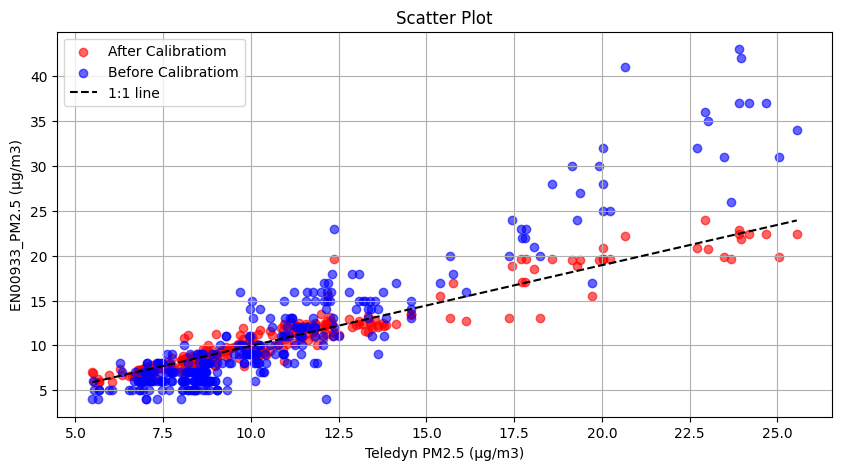

In [121]:
scatter_plot(combined_df, 'EN00933')

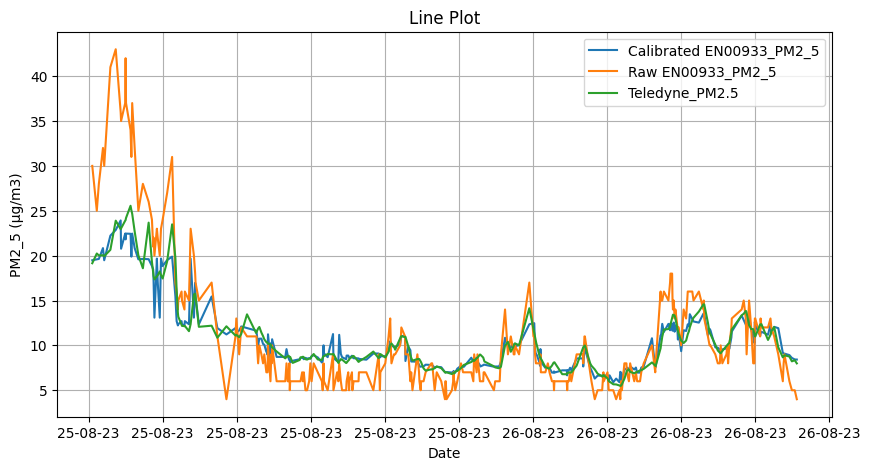

In [122]:
def plot_line_chart(df, sensor_id):
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=df['DataDate'], y=df['calibrated_PM2_5'], label=f'Calibrated {sensor_id}_PM2_5')
    sns.lineplot(x=df['DataDate'], y=df['PM2_5'], label=f'Raw {sensor_id}_PM2_5')
    sns.lineplot(x=df['DataDate'], y=df['PM2.5'], label='Teledyne_PM2.5')

    plt.title('Line Plot')
    plt.xlabel('Date')
    plt.ylabel('PM2_5 (μg/m3)')
    plt.grid(True)
    plt.legend()

    # Format the date on the x-axis to show hours and minutes (H:S)
    date_format = DateFormatter("%d-%m-%y")
    plt.gca().xaxis.set_major_formatter(date_format)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=0)
    
    
    # Save the graph as an image (e.g., PNG)
    plt.savefig('time_series_plot_for_calibration_with_random_forest_plots.png')

    # Display the plot
    plt.show()
plot_line_chart(combined_df, 'EN00933')

###  Xgboost

In [135]:
import xgboost as xgb

# Define your parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Create an XGBoost model
xgb_model = xgb.XGBRegressor()

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10, n_jobs=-1)

In [124]:
grid_search.fit(calibration_df_prepared, calibration_df_labels)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]})

In [125]:
# Get the best hyperparameters
best_params = grid_search.best_params_
best_params

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

In [126]:
# Train the final model with the best hyperparameters
final_model = xgb.XGBRegressor(**best_params)
final_model.fit(calibration_df_prepared, calibration_df_labels)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [127]:
# Evaluate the final model on the test set
final_predictions_xbg = final_model.predict(calibration_df_prepared_test)

In [128]:
_show_metrics_(y_test, final_predictions_xbg)

RMSE: 1.1211416207886267
MAE: 0.7613335907058235
R-squared (R²): 0.9227848914194068
Correlation: 0.9618358368652644


In [129]:
## Make scatter plot of y_pred and y_test
df = pd.DataFrame(final_predictions_xbg, columns=['calibrated_PM2_5'], index = X_test.index)
combined_df_two = pd.concat([df, X_test, y_test, X_date], axis=1)
combined_df_two

,calibrated_PM2_5,PM2_5,Temp,Hum,PM2.5,DataDate
83,22.734575,37.0,0.0,0.0,24.193350,2023-08-25 07:31:00
240,15.454203,17.0,0.0,0.0,15.378810,2023-08-25 10:20:00
755,7.561894,6.0,21.8,99.0,6.953430,2023-08-25 20:27:00
140,17.321753,22.0,0.0,0.0,17.731770,2023-08-25 08:38:00
964,11.233606,11.0,21.8,99.0,11.373090,2023-08-26 00:03:00
...,...,...,...,...,...,...
195,12.788550,16.0,0.0,0.0,16.142430,2023-08-25 09:34:00
433,8.645718,6.0,26.8,79.0,8.375084,2023-08-25 14:33:00
913,10.373965,10.0,22.0,99.0,9.725831,2023-08-25 23:11:00
1211,6.924155,6.0,21.6,100.0,7.035264,2023-08-26 04:13:00


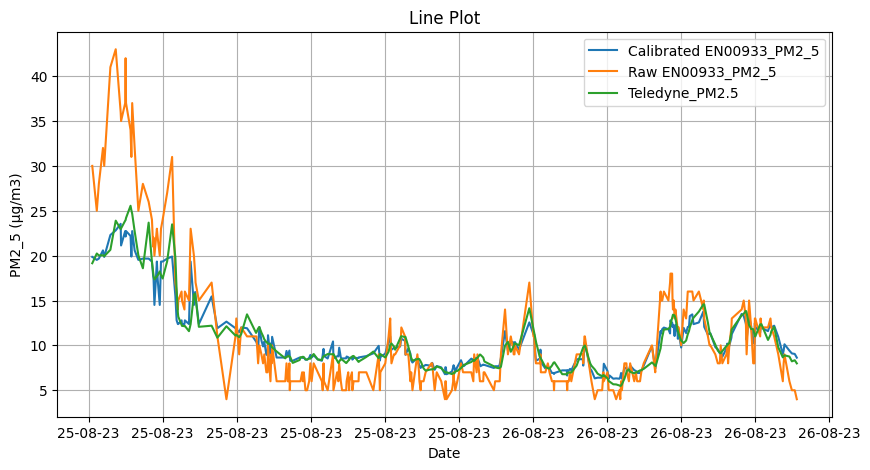

In [130]:
plot_line_chart(combined_df_two, 'EN00933')

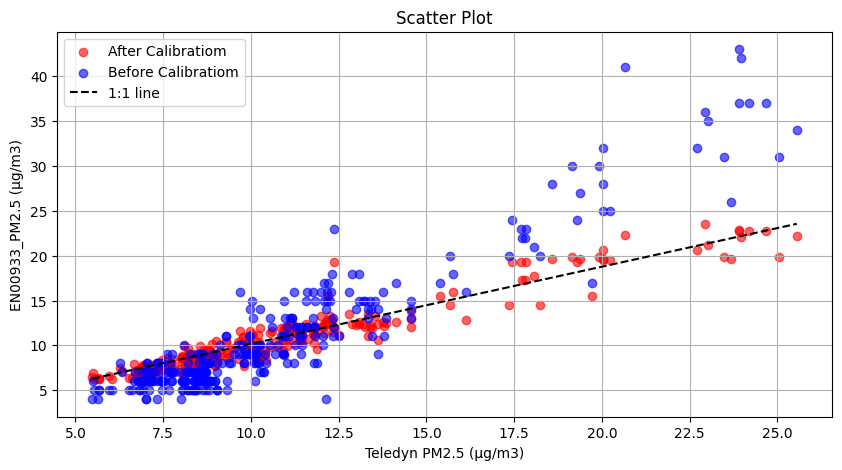

In [131]:
scatter_plot(combined_df_two, 'EN00933')